# Plot the DAG of the learned Bayesian network

In [1]:
# To manipulate data
import pandas as pd

# Plotting librairies
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib as mpl

Import the trained model

In [2]:
from joblib import load
import os

# Define the parent directory
parent_dir = os.path.abspath(
    os.path.join(os.getcwd(), os.pardir, os.pardir)
)

# Define the subfolder directory
output_folder = os.path.join(
    parent_dir, "outputs"
)

# Name of the model output file
file_name1 = "BayesNet-fit.joblib"
file_name2 = "BayesNet-IndTests.joblib"

model = load(
    os.path.join(
        output_folder,
        file_name1
    )
)

tests_df = load(
    os.path.join(
        output_folder,
        file_name2
    )
)

## Plot the DAG

The colour gradient is based on the chi-squared test to indicate edge strength.

[bnlearn]> Set edge weights based on the [g_sq] test statistic.
[bnlearn] >Converting source-target into adjacency matrix..
[bnlearn] >Making the matrix symmetric..
[bnlearn] >Set edge properties.


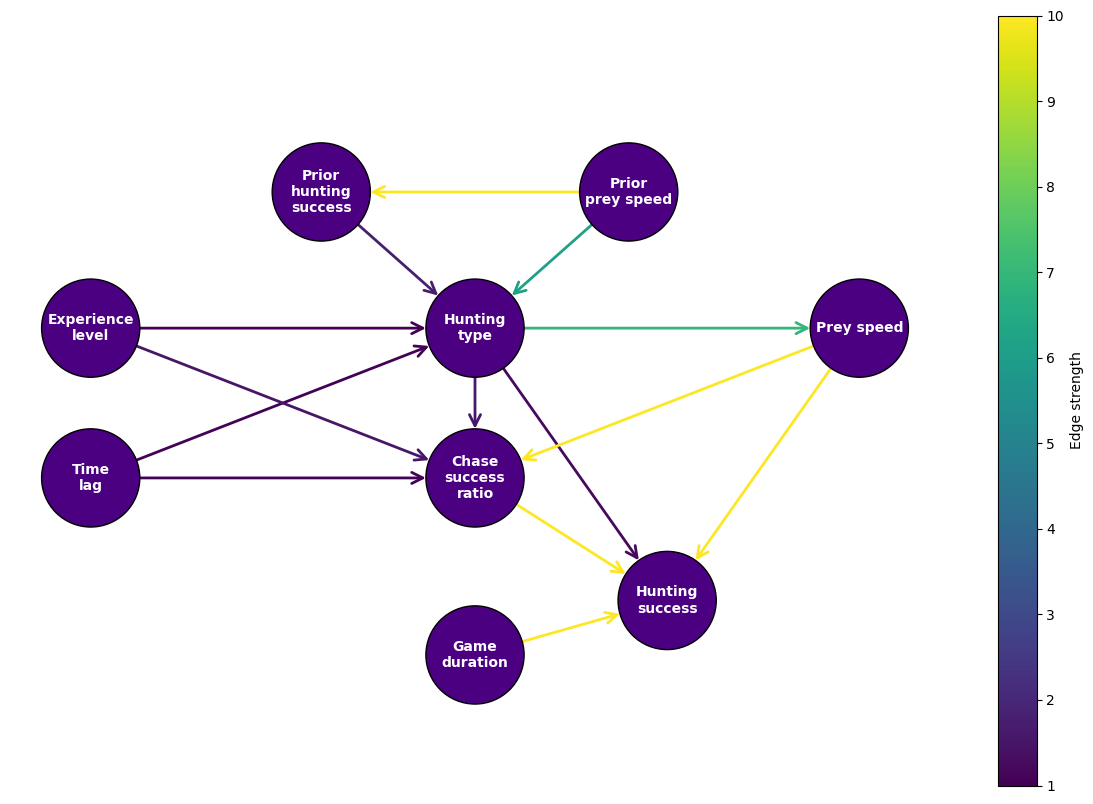

In [6]:
# Get edge properties from the DAG
edge_properties = bn.get_edge_properties(DAG)

# Create a directed graph
G = nx.DiGraph()

# Add edges with weights based on independence test results
for edge, properties in edge_properties.items():
    strength = properties.get("weight", 0)
    G.add_edge(*edge, weight = strength)

# Manually specify node names
node_mapping = {
    "hunting_type": "Hunting\ntype",
    "hunting_success": "Hunting\nsuccess",
    "prey_avg_speed_bin": "Prey speed",
    "prior_prey_speed_bin": "Prior\nprey speed",
    "prior_success": "Prior\nhunting\nsuccess",
    "chase_success_ratio_bin": "Chase\nsuccess\nratio",
    "time_lag_bin": "Time\nlag",
    "xp_level": "Experience\nlevel",
    "game_duration_bin": "Game\nduration"
}
G = nx.relabel_nodes(G, node_mapping)

# Define positions for the nodes
pos = {
    "Experience\nlevel": (0.5, 0),
    "Prior\nhunting\nsuccess": (0.8, 0.005),
    "Prior\nprey speed": (1.2, 0.005),
    "Time\nlag": (0.5, -0.0055),
    "Hunting\ntype": (1, 0),
    "Prey speed": (1.5, 0),
    "Chase\nsuccess\nratio": (1, -0.0055),
    "Hunting\nsuccess": (1.25, -0.01),
    "Game\nduration": (1, -0.012),
}

# Set a fixed larger size for nodes
node_size = 5000
node_sizes = [node_size for _ in range(len(G))]

# Define edge colors and transparency
M = G.number_of_edges()
edge_colors = [
    properties["weight"] for u, v,
    properties in G.edges(data = True)
]

# Use viridis colormap
cmap = plt.cm.viridis

# Plot size
plt.figure(figsize = (15, 10))

# Draw the DAG
nodes = nx.draw_networkx_nodes(
    G,
    pos,
    node_size = node_sizes,
    node_color = "indigo",
    edgecolors = "black"
)

edges = nx.draw_networkx_edges(
    G,
    pos,
    node_size = node_sizes,
    arrowstyle = "->",
    arrowsize = 20,
    edge_color = edge_colors,
    edge_cmap = cmap,
    width = 2,
)

pc = mpl.collections.PatchCollection(edges, cmap = cmap)
pc.set_array(edge_colors)

# Display node labels
node_labels = nx.draw_networkx_labels(
    G, pos,
    font_size = 10,
    font_weight = "bold",
    font_color = "white"
)

# Display the figure
ax = plt.gca()
ax.set_axis_off()
plt.colorbar(pc, ax = ax, label = "Edge strength")
plt.show()

The normalization used to compute the edge strength is performed as such :

$
normalized \ log \ likelihood = \frac{logL \ value - min \ logL \ value}{max \ logL \ value - min \ logL \ value}
$

Where:
- $logL \ value$ is the log likelihood test statistic value for a given edge.
- $min \ logL \ value$ is the minimum log likelihood test statistic value observed across all edges.
- $max \ logL \ value$ is the maximum log likelihood test statistic value observed across all edges.
- $normalized \ log \ likelihood$ is the normalized value within the range [0, 1].

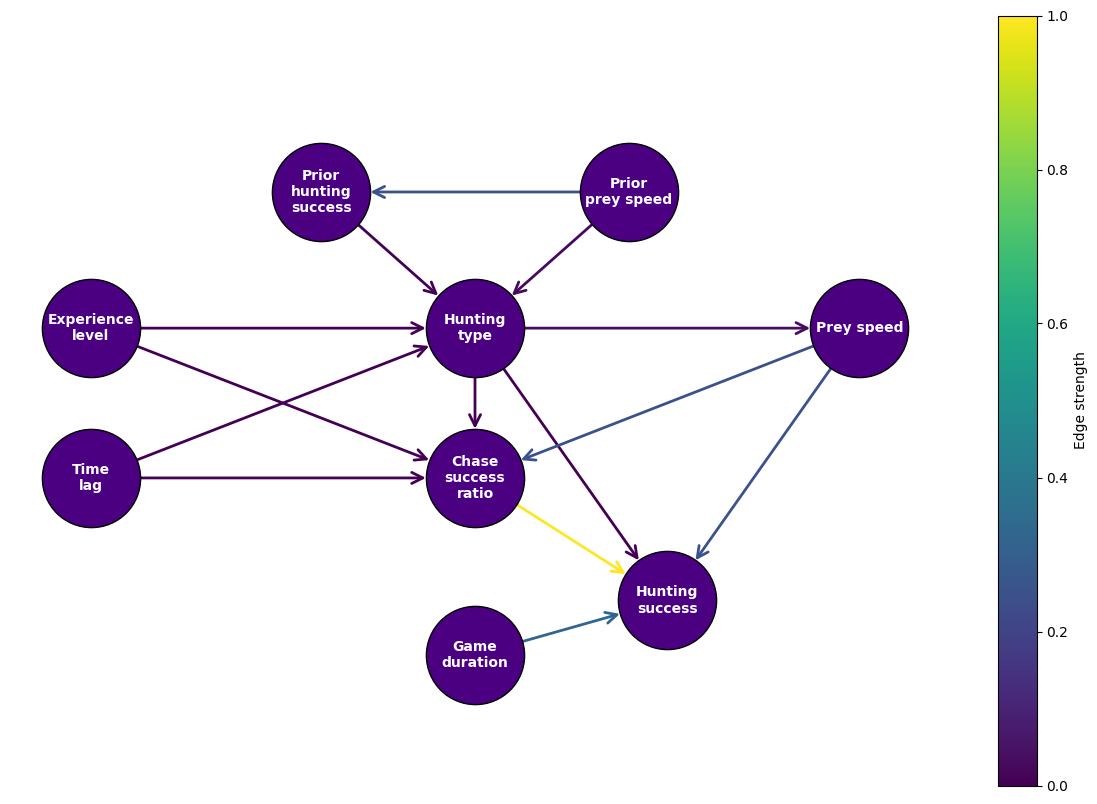

In [25]:
# Initialize an empty graph
G = nx.DiGraph()

# Rename the nodes
node_mapping = {
    "hunting_type": "Hunting\ntype",
    "hunting_success": "Hunting\nsuccess",
    "prey_avg_speed_bin": "Prey speed",
    "prior_prey_speed_bin": "Prior\nprey speed",
    "prior_success": "Prior\nhunting\nsuccess",
    "chase_success_ratio_bin": "Chase\nsuccess\nratio",
    "time_lag_bin": "Time\nlag",
    "xp_level": "Experience\nlevel",
    "game_duration_bin": "Game\nduration"
}

# Define positions for the nodes
pos = {
    "Experience\nlevel": (0.5, 0),
    "Prior\nhunting\nsuccess": (0.8, 0.005),
    "Prior\nprey speed": (1.2, 0.005),
    "Time\nlag": (0.5, -0.0055),
    "Hunting\ntype": (1, 0),
    "Prey speed": (1.5, 0),
    "Chase\nsuccess\nratio": (1, -0.0055),
    "Hunting\nsuccess": (1.25, -0.01),
    "Game\nduration": (1, -0.012),
}

# Add nodes to the graph
G.add_nodes_from(node_mapping.values())

# Iterate through the results dataframe to colour by edge strength
for _, row in tests_df.iterrows():
    source_node = node_mapping[row["Source_node"]]
    target_node = node_mapping[row["Target_node"]]
    test_statistic = row["Log_Likelihood"]
    
    # Normalize the test statistic to be between 0 and 1
    normalized_statistic = (test_statistic - tests_df["Log_Likelihood"].min()) / (
            tests_df["Log_Likelihood"].max() - tests_df["Log_Likelihood"].min())
    
    # Assign strength based on the normalized test statistic
    strength = normalized_statistic
    
    # Add edge to the graph
    G.add_edge(source_node, target_node, weight = strength)

# Plot size
plt.figure(figsize = (15, 10))

# Draw the DAG
nodes = nx.draw_networkx_nodes(
    G,
    pos,
    node_size = 5000,
    node_color = "indigo",
    edgecolors = "black"
)
edges = nx.draw_networkx_edges(
    G,
    pos,
    node_size = 5000,
    arrowstyle = "->",
    arrowsize = 20,
    width = 2,
    edge_color = [G[u][v]["weight"] for u, v in G.edges()]
)

# Display node labels
node_labels = nx.draw_networkx_labels(
    G,
    pos,
    font_size = 10,
    font_weight = "bold",
    font_color = "white"
)

# Set axis off
ax = plt.gca()
ax.set_axis_off()

# Add color bar
sm = mpl.cm.ScalarMappable(cmap = mpl.cm.viridis)
sm.set_array([0, 1])  # Range of values for the color bar
cbar = plt.colorbar(sm, ax = ax, orientation = "vertical")
cbar.set_label("Edge strength")

# Display the figure
plt.show()

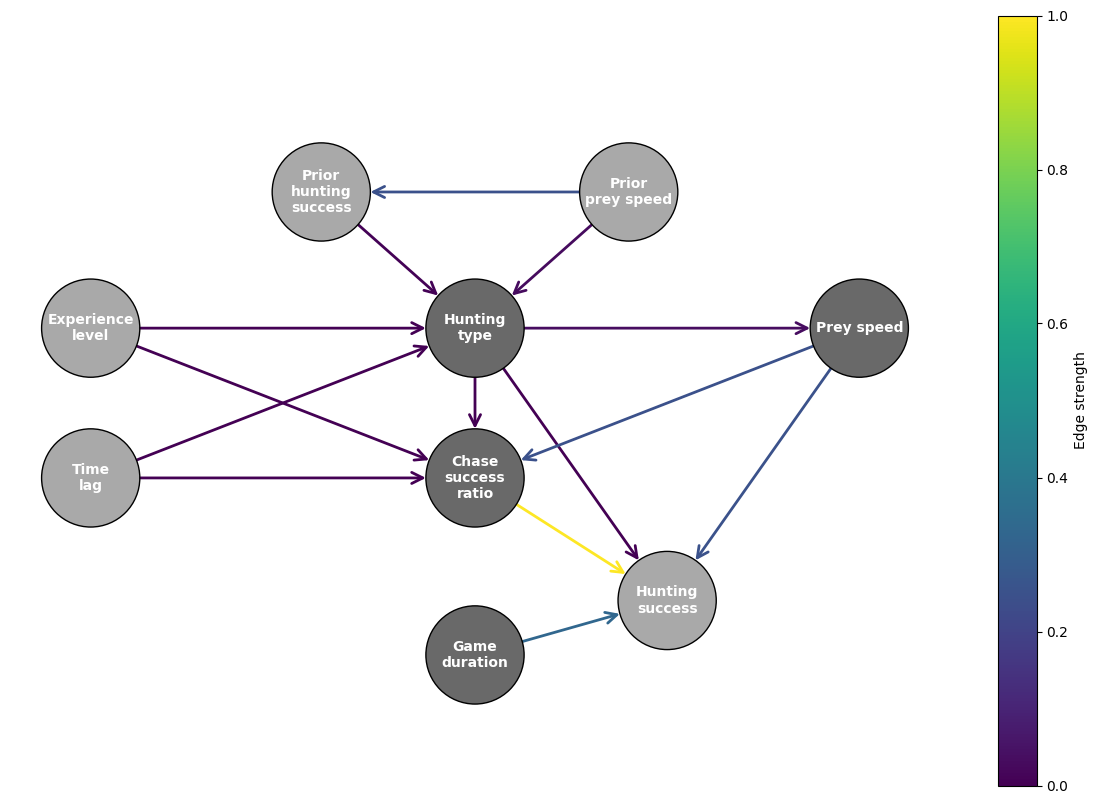

In [46]:
# Initialize an empty graph
G = nx.DiGraph()

# Rename the nodes
node_mapping = {
    "hunting_type": "Hunting\ntype",
    "hunting_success": "Hunting\nsuccess",
    "prey_avg_speed_bin": "Prey speed",
    "prior_prey_speed_bin": "Prior\nprey speed",
    "prior_success": "Prior\nhunting\nsuccess",
    "chase_success_ratio_bin": "Chase\nsuccess\nratio",
    "time_lag_bin": "Time\nlag",
    "xp_level": "Experience\nlevel",
    "game_duration_bin": "Game\nduration"
}

# Define positions for the nodes
pos = {
    "Experience\nlevel": (0.5, 0),
    "Prior\nhunting\nsuccess": (0.8, 0.005),
    "Prior\nprey speed": (1.2, 0.005),
    "Time\nlag": (0.5, -0.0055),
    "Hunting\ntype": (1, 0),
    "Prey speed": (1.5, 0),
    "Chase\nsuccess\nratio": (1, -0.0055),
    "Hunting\nsuccess": (1.25, -0.01),
    "Game\nduration": (1, -0.012),
}

# Add nodes to the graph
G.add_nodes_from(node_mapping.values())

# Iterate through the results dataframe to colour by edge strength
for _, row in tests_df.iterrows():
    source_node = node_mapping[row["Source_node"]]
    target_node = node_mapping[row["Target_node"]]
    test_statistic = row["Log_Likelihood"]
    
    # Normalize the test statistic to be between 0 and 1
    normalized_statistic = (test_statistic - tests_df["Log_Likelihood"].min()) / (
            tests_df["Log_Likelihood"].max() - tests_df["Log_Likelihood"].min())
    
    # Assign strength based on the normalized test statistic
    strength = normalized_statistic
    
    # Add edge to the graph
    G.add_edge(source_node, target_node, weight = strength)

# Retrieve the Markov blanket nodes for hunting success
original_markov_blanket_nodes = model.get_markov_blanket('hunting_success')

# Map the original node names to the renamed nodes in the graph
markov_blanket_nodes = [node_mapping[node] for node in original_markov_blanket_nodes]

# Modify node colors to identify Markov blanket nodes
node_colors = ["dimgray" if node in markov_blanket_nodes else "darkgray" for node in G.nodes]

# Plot size
plt.figure(figsize = (15, 10))

# Draw the DAG
nodes = nx.draw_networkx_nodes(
    G,
    pos,
    node_size = 5000,
    node_color = node_colors,
    edgecolors = "black"
)
edges = nx.draw_networkx_edges(
    G,
    pos,
    node_size = 5000,
    arrowstyle = "->",
    arrowsize = 20,
    width = 2,
    edge_color = [G[u][v]["weight"] for u, v in G.edges()]
)

# Display node labels
node_labels = nx.draw_networkx_labels(
    G,
    pos,
    font_size = 10,
    font_weight = "bold",
    font_color = "white"
)

# Set axis off
ax = plt.gca()
ax.set_axis_off()

# Add color bar
sm = mpl.cm.ScalarMappable(cmap = mpl.cm.viridis)
sm.set_array([0, 1])  # Range of values for the color bar
cbar = plt.colorbar(sm, ax = ax, orientation = "vertical")
cbar.set_label("Edge strength")

# Display the figure
plt.show()


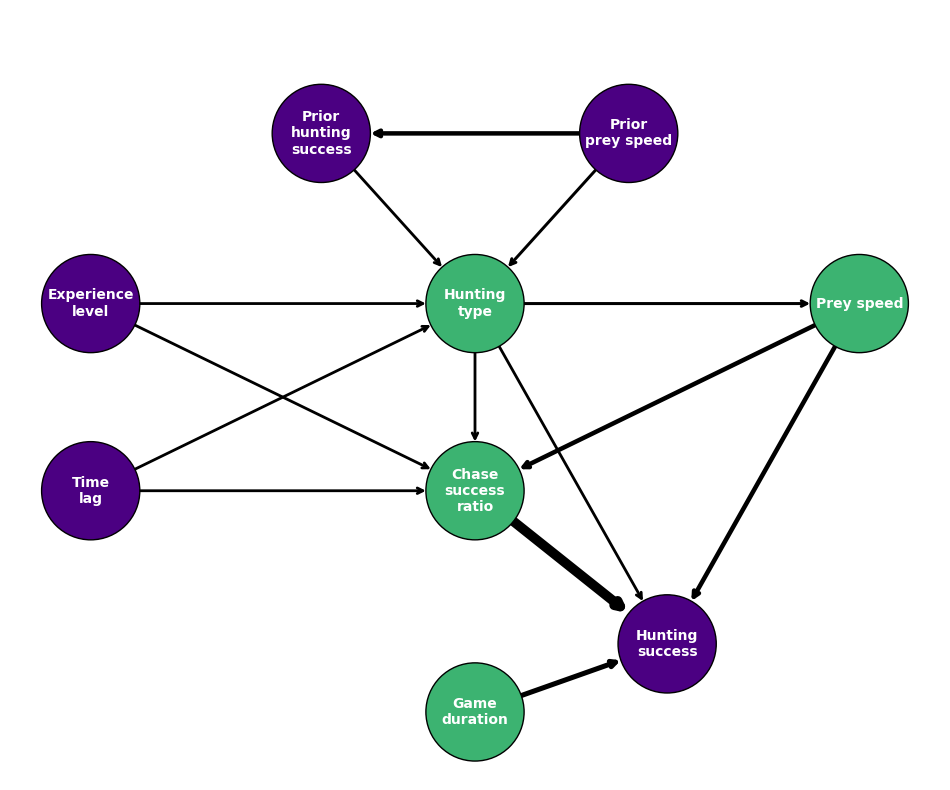

In [100]:
# Initialize an empty graph
G = nx.DiGraph()

# Rename the nodes
node_mapping = {
    "hunting_type": "Hunting\ntype",
    "hunting_success": "Hunting\nsuccess",
    "prey_avg_speed_bin": "Prey speed",
    "prior_prey_speed_bin": "Prior\nprey speed",
    "prior_success": "Prior\nhunting\nsuccess",
    "chase_success_ratio_bin": "Chase\nsuccess\nratio",
    "time_lag_bin": "Time\nlag",
    "xp_level": "Experience\nlevel",
    "game_duration_bin": "Game\nduration"
}

# Define positions for the nodes
pos = {
    "Experience\nlevel": (0.5, 0),
    "Prior\nhunting\nsuccess": (0.8, 0.005),
    "Prior\nprey speed": (1.2, 0.005),
    "Time\nlag": (0.5, -0.0055),
    "Hunting\ntype": (1, 0),
    "Prey speed": (1.5, 0),
    "Chase\nsuccess\nratio": (1, -0.0055),
    "Hunting\nsuccess": (1.25, -0.01),
    "Game\nduration": (1, -0.012),
}

# Add nodes to the graph
G.add_nodes_from(node_mapping.values())

# Iterate through the results dataframe to use arrow widths for edge strength
for _, row in tests_df.iterrows():
    source_node = node_mapping[row["Source_node"]]
    target_node = node_mapping[row["Target_node"]]
    test_statistic = row["Log_Likelihood"]
    
    # Normalize the test statistic to be between 0 and 1
    normalized_statistic = (test_statistic - tests_df["Log_Likelihood"].min()) / (
            tests_df["Log_Likelihood"].max() - tests_df["Log_Likelihood"].min())
    
    # Assign strength based on the normalized test statistic
    strength = normalized_statistic
    
    # Add edge to the graph
    G.add_edge(source_node, target_node, weight=strength)

# Retrieve the Markov blanket nodes for hunting success
original_markov_blanket_nodes = model.get_markov_blanket("hunting_success")

# Map the original node names to the renamed nodes in the graph
markov_blanket_nodes = [node_mapping[node] for node in original_markov_blanket_nodes]

# Modify node colors to identify Markov blanket nodes
node_colors = ["mediumseagreen" if node in markov_blanket_nodes else "indigo" for node in G.nodes]

# Plot size
plt.figure(figsize = (12, 10))

# Draw the DAG with different arrow widths based on edge strength
edges = nx.draw_networkx_edges(
    G,
    pos,
    node_size = 5000,
    edge_color = "black",
    arrowstyle = "->",
    # Base factor (2). I can play with the scaling factor (5)
    width = [2 + 5 * G[u][v]["weight"] for u, v in G.edges()]
)

# Draw the nodes
nx.draw_networkx_nodes(
    G,
    pos,
    node_size = 5000,
    node_color = node_colors,
    edgecolors = "black"
)

# Draw the node labels
nx.draw_networkx_labels(
    G,
    pos,
    font_size = 10,
    font_weight = "bold",
    font_color = "white"
)

# Display the figure
plt.axis("off")
plt.show()


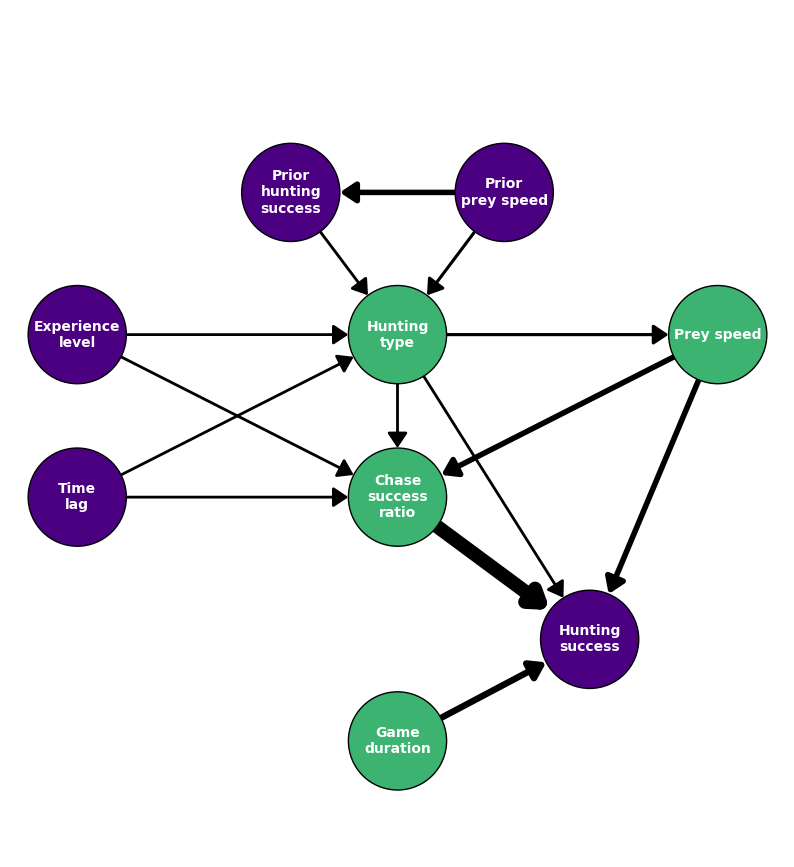

In [99]:
# Initialize an empty graph
G = nx.DiGraph()

# Rename the nodes
node_mapping = {
    "hunting_type": "Hunting\ntype",
    "hunting_success": "Hunting\nsuccess",
    "prey_avg_speed_bin": "Prey speed",
    "prior_prey_speed_bin": "Prior\nprey speed",
    "prior_success": "Prior\nhunting\nsuccess",
    "chase_success_ratio_bin": "Chase\nsuccess\nratio",
    "time_lag_bin": "Time\nlag",
    "xp_level": "Experience\nlevel",
    "game_duration_bin": "Game\nduration"
}

# Define positions for the nodes
pos = {
    #"Experience\nlevel": (0.5, 0),
    "Experience\nlevel": (0.7, 0),
    #"Prior\nhunting\nsuccess": (0.8, 0.005),
    #"Prior\nprey speed": (1.2, 0.005),
    "Prior\nhunting\nsuccess": (0.9, 0.007),
    "Prior\nprey speed": (1.1, 0.007),
    #"Time\nlag": (0.5, -0.0055),
    "Time\nlag": (0.7, -0.008),
    "Hunting\ntype": (1, 0),
    #"Prey speed": (1.5, 0),
    "Prey speed": (1.3, 0),
    #"Chase\nsuccess\nratio": (1, -0.0055),
    "Chase\nsuccess\nratio": (1, -0.008),
    #"Hunting\nsuccess": (1.25, -0.01),
    "Hunting\nsuccess": (1.18, -0.015),
    #"Game\nduration": (1, -0.012),
    "Game\nduration": (1, -0.02),
}

# Add nodes to the graph
G.add_nodes_from(node_mapping.values())

# Iterate through the results dataframe to use arrow widths for edge strength
for _, row in tests_df.iterrows():
    source_node = node_mapping[row["Source_node"]]
    target_node = node_mapping[row["Target_node"]]
    test_statistic = row["Log_Likelihood"]
    
    # Normalize the test statistic to be between 0 and 1
    normalized_statistic = (test_statistic - tests_df["Log_Likelihood"].min()) / (
            tests_df["Log_Likelihood"].max() - tests_df["Log_Likelihood"].min())
    
    # Assign strength based on the normalized test statistic
    strength = normalized_statistic
    
    # Add edge to the graph
    G.add_edge(source_node, target_node, weight = strength)

# Retrieve the Markov blanket nodes for hunting success
original_markov_blanket_nodes = model.get_markov_blanket("hunting_success")

# Map the original node names to the renamed nodes in the graph
markov_blanket_nodes = [node_mapping[node] for node in original_markov_blanket_nodes]

# Modify node colors to identify Markov blanket nodes
node_colors = ["mediumseagreen" if node in markov_blanket_nodes else "indigo" for node in G.nodes]

# Plot size
plt.figure(figsize = (10, 11))

# Draw the DAG with different arrow widths based on edge strength
edges = nx.draw_networkx_edges(
    G,
    pos,
    node_size = 5000,
    edge_color = "black",
    arrowstyle = "-|>, head_width=0.6,head_length=0.9",
    # Base factor (2). I can play with the scaling factor (8)
    width = [2 + 8 * G[u][v]["weight"] for u, v in G.edges()]
)

# Draw the nodes
nx.draw_networkx_nodes(
    G,
    pos,
    node_size = 5000,
    node_color = node_colors,
    edgecolors = "black"
)

# Draw the node labels
nx.draw_networkx_labels(
    G,
    pos,
    font_size = 10,
    font_weight = "bold",
    font_color = "white"
)

# Display the figure
plt.axis("off")
plt.show()
